In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy as sp
from scipy.sparse import csr_matrix

In [2]:
hf = h5py.File('output_digi_HDF_1000.h5', 'r')

In [3]:
events = []
for i in hf.keys():
    events.append(hf[i])

In [4]:
DETECTOR_LENGTH = 1000.0
DETECTOR_RADIUS = 275.0

x_disc = 128
y_disc = 128
z_disc = 128

x_inc = (2*DETECTOR_RADIUS)/x_disc
y_inc = (2*DETECTOR_RADIUS)/y_disc
z_inc = DETECTOR_LENGTH/z_disc

In [5]:
#DISCRETIZING A BUNCH XY
discElements = x_disc*y_disc*z_disc

buckets = []
amplitudes = []

test_events = list(range(100))
new_data = []

for i in range(len(events)):
    new_events = np.zeros(128*128*128)
    num_pts = 0
    discretized_xyz = np.zeros([len(events[i]),5])
    for point in events[i]:
        x_bucket = math.floor(((point[0]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*x_disc)
        y_bucket = math.floor(((point[1]+DETECTOR_RADIUS)/(2*DETECTOR_RADIUS))*y_disc)
        z_bucket = math.floor((point[2]/DETECTOR_LENGTH)*z_disc)

        bucket_num = z_bucket*x_disc*y_disc + x_bucket + y_bucket*x_disc
    
        #sparse matrix implementation
        buckets.append(bucket_num)
        amplitudes.append(point[4])
    
        avg_x = -DETECTOR_RADIUS + ((2*x_bucket+1)*x_inc)/2.0
        avg_y = -DETECTOR_RADIUS + ((2*y_bucket+1)*y_inc)/2.0
        avg_z = ((2*z_bucket+1)*z_inc)/2.0   
        
        new_events[bucket_num] = avg_z
    
        discretized_xyz[num_pts] = [avg_x, avg_y, avg_z, float(point[3]), point[4]]
    
        num_pts += 1

    
    E = new_events.reshape((128,128,128))
    E_2d = np.sum(E,axis=0)
    new_data.append(E_2d)

In [6]:
new_data=np.array(new_data)

In [12]:
print(new_data)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [7]:
#Make sure it's the right shape
print(new_data.shape)

(2000, 128, 128)


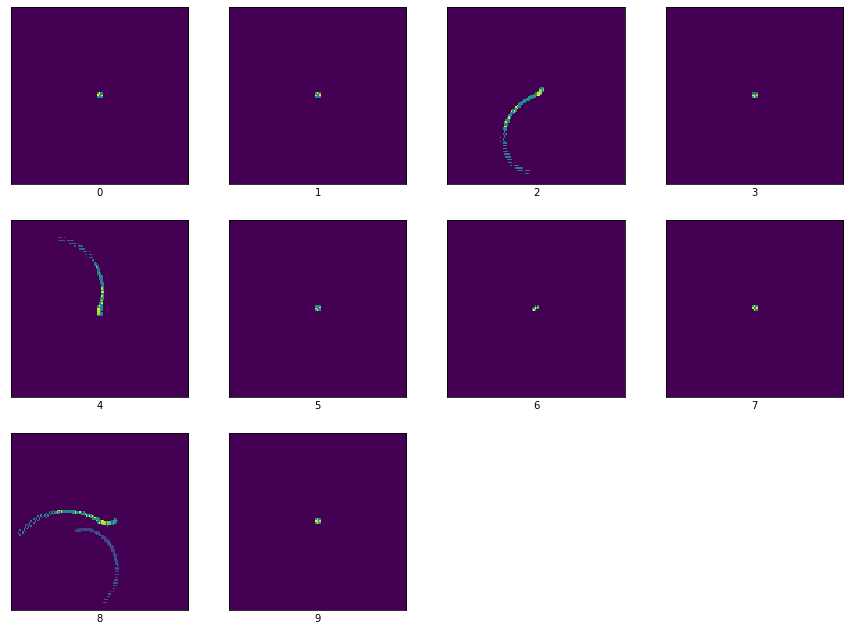

In [8]:
#Make sure they look right
plt.figure(figsize=(15,15))
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(new_data[i])
    plt.xlabel(i)
plt.show()

In [9]:
#Image labels: 1 for other only, 2 for event
count = []
for i in range(2000):
    if i == 0:
        num=1
    elif(i % 2) == 0:
        num = 2
    else:
        num = 1
        
    count.append(num)

In [10]:
count=np.array(count)


In [11]:
#Save as h5 file if wanted

f = h5py.File("xy-Mg22.h5", "w")
dset = f.create_dataset("features", data=new_data)
dset2 = f.create_dataset("targets", data=count)
f.close()